In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Caricare i dataset
file_performance = "UCL_AllTime_Performance_Table.csv"  # Percorso al file
file_finals = "UCL_Finals_1955-2023.csv" 

df1=pd.read_csv(file_performance)
df2=pd.read_csv(file_finals)

df1.head()
df2.head()

df1 = df1.drop(columns=['#', 'Pt.'])
df1 = df1.rename(columns={'M.':'Match_Played', 'W':'Wins',
                       'D':'Draw', 'L':'Losses', 'goals':'Goals', 
                        'Dif':'Goal_Difference' })

df1[['Goals_Scored', 'Goals_Against', 'Temp']] = df1['Goals'].str.split(':', expand=True)
df1['Goals_Scored'] = df1['Goals_Scored'].astype(int) 
df1.drop(columns=['Goals','Goals_Against', 'Temp'], inplace=True)

df1.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored
0,Real Madrid,486,291,85,110,533,1076
1,Bayern Munich,388,231,78,79,427,817
2,FC Barcelona,341,196,77,68,319,675
3,Manchester United,289,153,69,67,224,524
4,Juventus,297,151,68,78,171,472


In [61]:
df1.drop(df1[df1['Match_Played'] <= 10].index, inplace=True)

df1.head()



,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored
0,Real Madrid,486,291,85,110,533,1076
1,Bayern Munich,388,231,78,79,427,817
2,FC Barcelona,341,196,77,68,319,675
3,Manchester United,289,153,69,67,224,524
4,Juventus,297,151,68,78,171,472


In [62]:
df1['Win_Rate'] = df1['Wins'] / df1['Match_Played'] * 100
df1['Draw_Rate'] = df1['Draw'] / df1['Match_Played'] * 100
df1['Loss_Rate'] = df1['Losses'] / df1['Match_Played'] * 100
df1.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Win_Rate,Draw_Rate,Loss_Rate
0,Real Madrid,486,291,85,110,533,1076,59.876543,17.489712,22.633745
1,Bayern Munich,388,231,78,79,427,817,59.536082,20.103093,20.360825
2,FC Barcelona,341,196,77,68,319,675,57.478006,22.580645,19.941349
3,Manchester United,289,153,69,67,224,524,52.941176,23.875433,23.183391
4,Juventus,297,151,68,78,171,472,50.841751,22.895623,26.262626


In [72]:
highest_win_rate = df1.loc[df1['Win_Rate'].idxmax(), ['Team', 'Match_Played']]

# Trova il team con il Draw Rate più alto
highest_draw_rate = df1.loc[df1['Draw_Rate'].idxmax(), ['Team', 'Match_Played']]

# Trova il team con il Loss Rate più alto
highest_loss_rate = df1.loc[df1['Loss_Rate'].idxmax(), ['Team', 'Match_Played']]

# Stampa i risultati
print("Team con il Win Rate più alto e partite giocate:\n", highest_win_rate)
print("\nTeam con il Draw Rate più alto e partite giocate:\n", highest_draw_rate)
print("\nTeam con il Loss Rate più alto e partite giocate:\n", highest_loss_rate)

Team con il Win Rate più alto e partite giocate:
 Team            Nottingham Forest
Match_Played                   20
Name: 82, dtype: object

Team con il Draw Rate più alto e partite giocate:
 Team            Rubin Kazan
Match_Played             12
Name: 154, dtype: object

Team con il Loss Rate più alto e partite giocate:
 Team            Maccabi Tel Aviv
Match_Played                  14
Name: 243, dtype: object


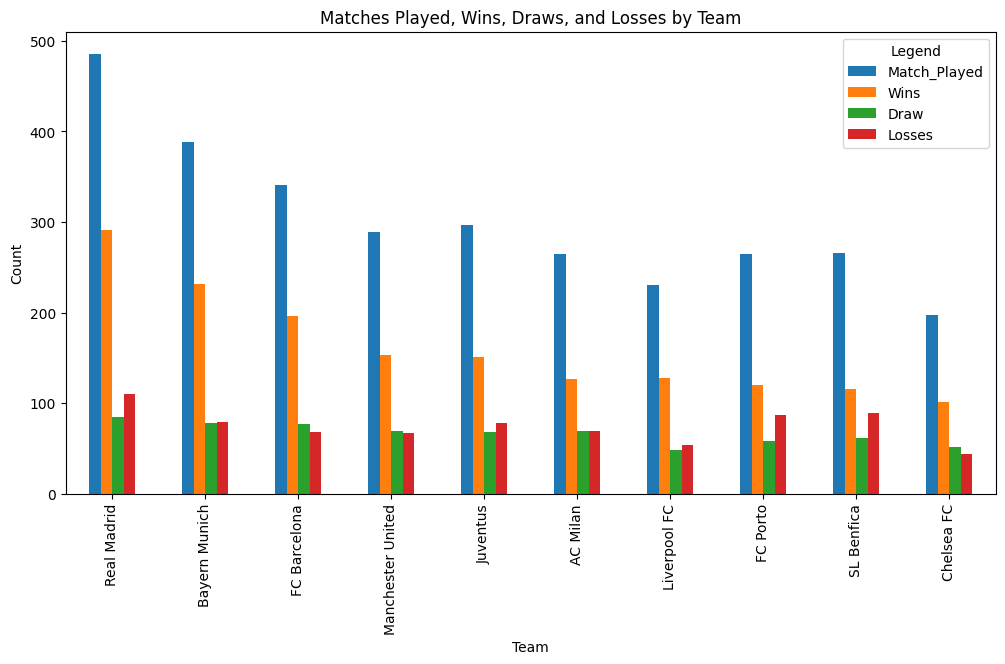

In [63]:
df1.set_index('Team')[['Match_Played', 'Wins', 'Draw', 'Losses']].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Matches Played, Wins, Draws, and Losses by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Legend')
plt.show()

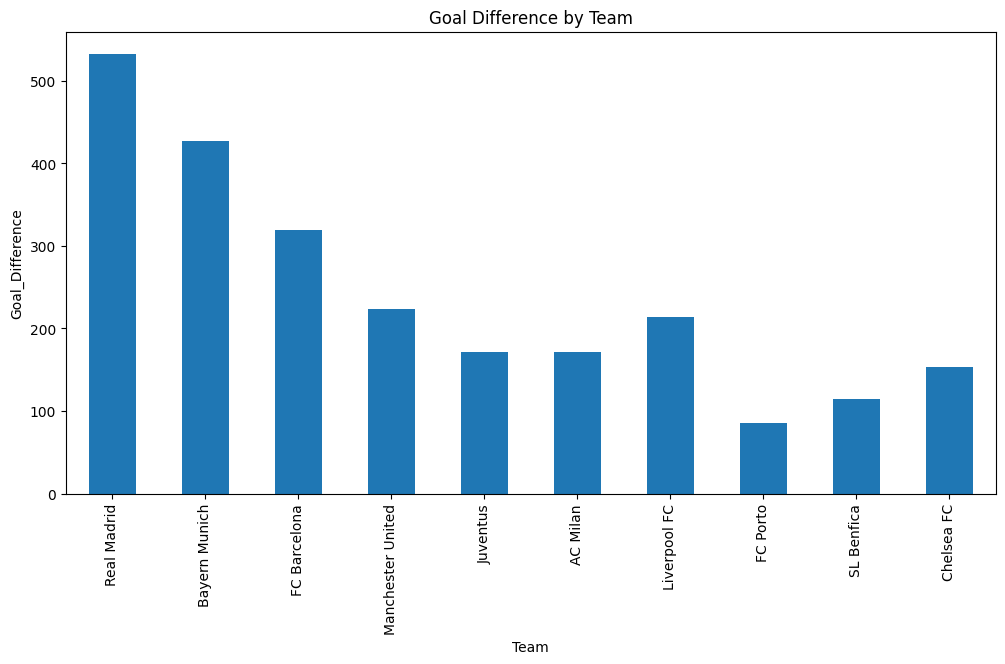

In [64]:
df1.set_index('Team')['Goal_Difference'].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal_Difference')
plt.show()

In [65]:


df = df2[['Winners', 'Season']]

df.head()


,Winners,Season
0,Real Madrid,1955–56
1,Real Madrid,1956–57
2,Real Madrid,1957–58
3,Real Madrid,1958–59
4,Real Madrid,1959–60


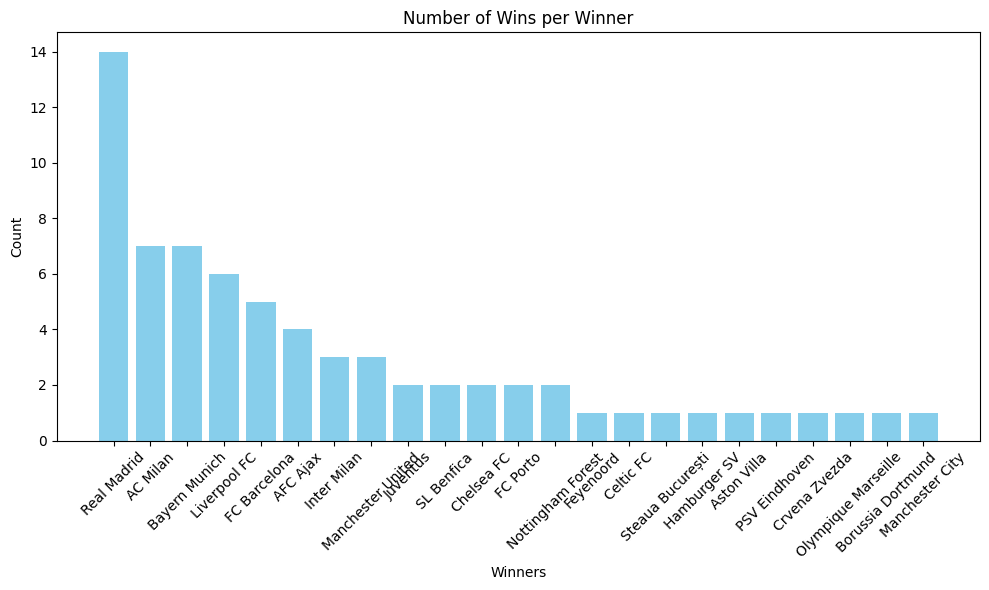

In [66]:
winners_count = df2['Winners'].value_counts()

winners = winners_count.index 
counts = winners_count.values  
plt.figure(figsize=(10, 6))  
plt.bar(winners, counts, color='skyblue')  
plt.xlabel('Winners')  
plt.ylabel('Count')    
plt.title('Number of Wins per Winner')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [67]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#model = Sequential()
# model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=8, activation='relu'))
# model.add(Dense(units=1))  #valore continuo
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
#test_loss = model.evaluate(X_test, y_test, verbose=0)
#print(f"Test loss (MSE): {test_loss}")
#y_pred = model.predict(X_test)
#for real, pred in zip(y_test[:5], y_pred[:5]):
    #print(f"Valore reale: {real}, Predizione: {pred[0]}")

#plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='Valori Reali', color='blue')
# plt.plot(y_pred, label='Valori Predetti', color='red', linestyle='--')
# plt.xlabel('Indici del test set')
# plt.ylabel('Goals')
# plt.title('Confronto tra Valori Reali e Predetti')
# plt.legend()
# plt.show()

# #plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Loss (training)', color='blue')
# plt.plot(history.history['val_loss'], label='Loss (validation)', color='red')
# plt.xlabel('Epoche')
# plt.ylabel('Loss')
# plt.title('Andamento della Loss durante l\'allenamento')
# plt.legend()
# plt.show()


Accuracy on test set: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



c:\Users\ianni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Cross-validation scores:
[0.96969697 0.96969697 1.         1.         0.96875   ]
Mean CV accuracy: 0.9816
Standard deviation of CV accuracy: 0.0150
Training accuracy: 1.0000
Test accuracy: 1.0000


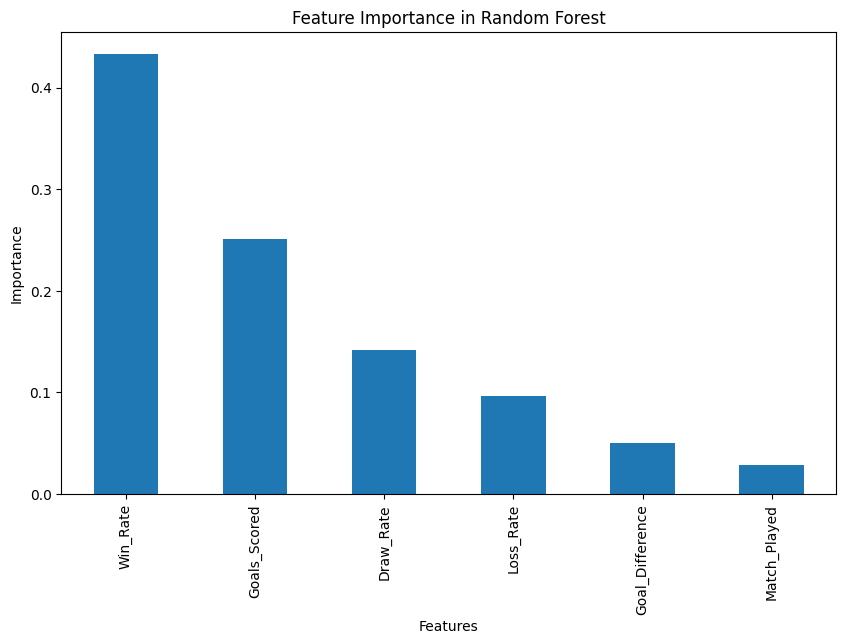

In [ ]:

df1['Victory'] = df1['Wins'].apply(lambda x: 1 if x > 0 else 0)  

features = ['Match_Played', 'Win_Rate', 'Draw_Rate', 'Loss_Rate', 'Goal_Difference', 'Goals_Scored']

X = df1[features]
y = df1['Victory']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cross_val_score_rf = cross_val_score(rf, X, y, cv=5)  
print("\nCross-validation scores:")
print(cross_val_score_rf)
print(f"Mean CV accuracy: {cross_val_score_rf.mean():.4f}")
print(f"Standard deviation of CV accuracy: {cross_val_score_rf.std():.4f}")


train_accuracy = rf.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


feature_importances = pd.Series(rf.feature_importances_, index=features)
feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()